Exploritory Data Analysis

In [1]:
import numpy as np

In [30]:
my_list=[1,2,3,6]
my_list*3
#Numpy Array
my_array=np.array([1,2,3,6])
my_array*4

my_new_array=np.array([1,2,3,"6"])
my_new_array


array(['1', '2', '3', '6'], dtype='<U21')

Why use Numpy arrays


In [17]:
import time

In [25]:
size=100000000
py_list=[x for x in range(size)]
np_array=np.arange(size)

start=time.time()
py_list_squared=[x**2 for x in py_list]
end=time.time()
py_time=end-start

start=time.time()
np_squared=np_array**2
end=time.time()
np_time=end-start

print("pytime",py_time,"nptime",np_time)


pytime 8.384513139724731 nptime 1.1086010932922363


# Using Pandas

In [26]:
import pandas as pd

<Axes: >

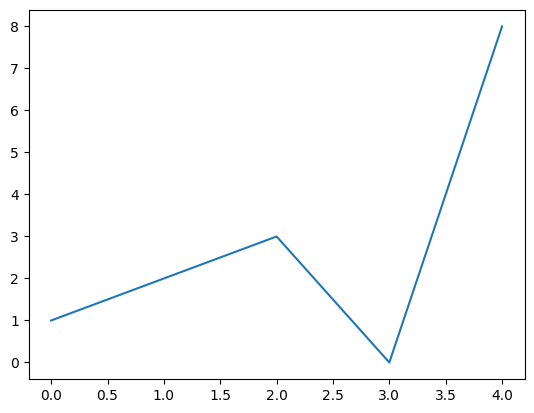

In [41]:
my_series=pd.Series([1,2,3,0,8])
my_series.sum()/my_series.count()
my_series.plot()

In [44]:
my_series[3]=2.98
my_series

,0
0,1.00
1,2.00
2,3.00
3,2.98
4,8.00


#Make a datafram by hand because it is fun

In [46]:
wrestlers=['john cena', 'the rock', 'hulk','stone cold']
matches=[1500,800,1200,1100]

<Axes: xlabel='Wrestler'>

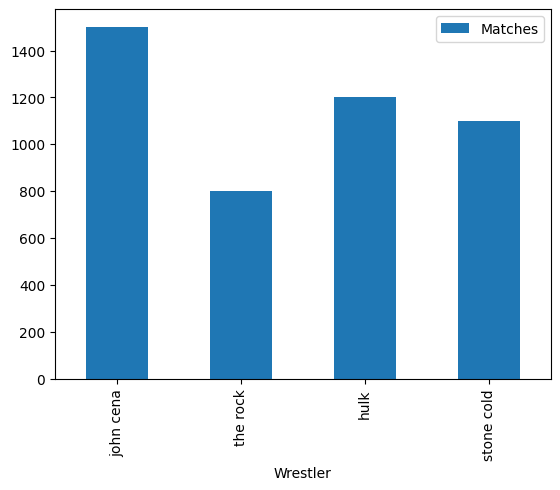

In [55]:
df=pd.DataFrame(columns=["Wrestler","Matches"])
df['Wrestler']=wrestlers
df['Matches']=matches
df['Wins']=[10,20,30,40]
df.plot(x='Wrestler',y='Matches', kind='bar')

In [59]:
adoptions_df=pd.read_csv("/content/adoptions.txt", sep="\t")
adoptions_df.head(10)

,State,Adoptions,Population(2014),Adoptions.per.100000
0,Alabama,548,4849377,11.300421
1,Alaska,367,736732,49.814587
2,Arizona,3090,6731484,45.903697
3,Arkansas,743,2966369,25.047457
4,California,5471,38802500,14.099607
5,Colorado,769,5355866,14.358089
6,Connecticut,502,3596677,13.957328
7,Delaware,84,935614,8.978061
8,District of Columbia,107,658893,16.239359
9,Florida,3265,19893297,16.412563


# Using Pandas for Exploritory Data Analysis

In [65]:
#How many Rows
len(adoptions_df)
#types of data by column
adoptions_df.dtypes

adoptions_df.describe()

adoptions_df.sort_values(by=["Adoptions"])
#make a new column
adoptions_df["Standardized"]=adoptions_df["Adoptions"]/adoptions_df["Adoptions"].max()
adoptions_df.head(10)

,State,Adoptions,Population(2014),Adoptions.per.100000,Standardized
0,Alabama,548,4849377,11.300421,0.100165
1,Alaska,367,736732,49.814587,0.067081
2,Arizona,3090,6731484,45.903697,0.564796
3,Arkansas,743,2966369,25.047457,0.135807
4,California,5471,38802500,14.099607,1.000000
5,Colorado,769,5355866,14.358089,0.140559
6,Connecticut,502,3596677,13.957328,0.091757
7,Delaware,84,935614,8.978061,0.015354
8,District of Columbia,107,658893,16.239359,0.019558
9,Florida,3265,19893297,16.412563,0.596783


# Subsetting the data


In [68]:
adoptions_df['State']
adoptions_df[adoptions_df["State"]=="Virginia"] #== means filter or where equal to
#& in pandas, "and" in python.... "or" in python is | in pandas (above \)
# != not equal

,State,Adoptions,Population(2014),Adoptions.per.100000,Standardized
46,Virginia,632,8326289,7.590416,0.115518


In [69]:
adoptions_df[adoptions_df["Adoptions"]>3000]

,State,Adoptions,Population(2014),Adoptions.per.100000,Standardized
2,Arizona,3090,6731484,45.903697,0.564796
4,California,5471,38802500,14.099607,1.000000
9,Florida,3265,19893297,16.412563,0.596783
43,Texas,5221,26956958,19.367912,0.954305


In [71]:
#more than 3000 adoptions or less than 1000
new_df=adoptions_df[(adoptions_df["Adoptions"]>3000)|(adoptions_df["Adoptions"]<1000)]

In [72]:
adoptions_df[adoptions_df["State"].str.startswith('V')]

,State,Adoptions,Population(2014),Adoptions.per.100000,Standardized
45,Vermont,161,626562,25.695781,0.029428
46,Virginia,632,8326289,7.590416,0.115518


In [74]:
new_df.to_csv('/content/small_adopt.csv')

In [83]:
#Using iloc
new_df.iloc[0,1] #rows, column
new_df.iloc[:,1]

,Adoptions
0,548
1,367
2,3090
3,743
4,5471
5,769
6,502
7,84
8,107
9,3265


Work with Titanic Data

In [99]:
df=pd.read_csv('titanic_data.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Exporitory Data Analysis

In [91]:
df.shape #rows, columns
df.info()
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [96]:
df.isna().sum() # find NAs
df1=df.dropna() #drops all rows with NAs
df.fillna(0)
df1.isna().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0


In [100]:
small_df=df[['age','cabin']]
small_df.head()

,age,cabin
0,29.0000,B5
1,0.9167,C22 C26
2,2.0000,C22 C26
3,30.0000,C22 C26
4,25.0000,C22 C26


In [101]:
pd.crosstab(df['survived'],df['sex'])

sex,female,male
survived,,
0,127,682
1,339,161


In [102]:
df['survived'].value_counts()

,count
survived,
0,809
1,500


<Axes: xlabel='survived'>

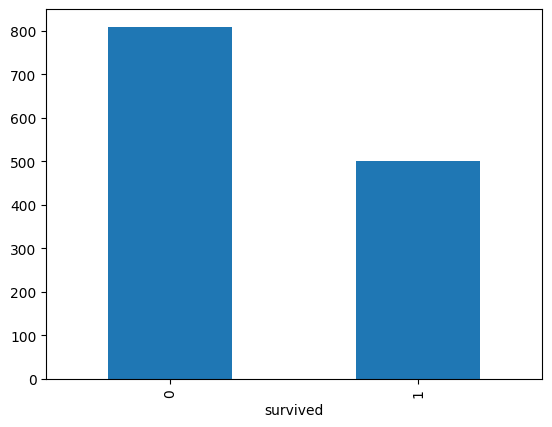

In [103]:
df['survived'].value_counts().plot(kind="bar")

In [105]:
df.drop(labels='body', axis=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN
